<font size="5"><center>Tópicos selectos de análisis de datos<center><font>
<font size="4"><center>Tarea 1<center>
<center>Para entregar el 27 de agosto de 2021<center>

Instrucciones: 
- Entrega un solo jupyter notebook por tarea. Incluye cualquier archivo, imágen, datos, etcétera, para que pueda ejecutarse. Si lo crees conveniente, puedes usar latex para los ejercicios que lo requieran.

- Usa python 3.x y tensorflow 2.x

- Todos tus archivos DEBES nombrarlos con el siguiente formato: TareaXXX_Nombre_Apellido.ipynb, TareaXXX_Nombre_Apellido.pdf, TareaXXX_Nombre_Apellido.csv, etcétera.

- Crea una carpeta con nombre TareaXXX_Nombre_Apellido donde incluirás todos tus archivos, y entrega UN SOLO archivo ZIP usando el mismo formato para el nombre: TareaXXX_Nombre_Apellido.zip

- LAS TAREAS SON INDIVIDUALES, a menos que se especifique lo contrario


1. Calcula lo siguiente:

\begin{equation*}
\left(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right)
\left(
\begin{array}{cc}
0 & 1 \\
2 & 3
\end{array}
\right)
+
\left(
\begin{array}{cc}
7 & 9
\end{array}
\right)
\end{equation*}

Usa broadcasting de tal forma que la operación esté bien definida. Antes, averigua qué es broadcasting, en el contextos de numpy-tensorflow...

<font color=green>Tu respuesta aquí</font>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
import timeit

print("TensorFlow version %s" % tf.__version__)

#Definimos nuestros tensores
T1 = tf.constant([[1,2],[3,4]])
T2 = tf.constant([[0,1],[2,3]])
T3 = tf.constant([7,9])

#Realizamos la operación que nos estan solicitando
a = tf.matmul(T1,T2) #primero se realiza la multiplicación de las matrices
b = a + T3 #Finalmente se realiza la suma de la matriz a y la matriz T3
# Imprimimos en pantalla el resultado
print(" ")
print("El resultado es: ", b)

TensorFlow version 2.4.1
 
El resultado es:  tf.Tensor(
[[11 16]
 [15 24]], shape=(2, 2), dtype=int32)


2. Las funciones  `tf.math.reduce_` de `tensorflow` reducen las dimensiones de un tensor realizando operaciones en sus elementos. Por ejemplo,
```python
x = tf.constant([[1, 1, 1], [1, 1, 1]])
tf.reduce_sum(x)
# obtenemos 6
tf.reduce_sum(x, 0)
## dará como resultado
[2, 2, 2]
```
Ahora, considera el siguiente código:
```python
a = tf.constant([[1.], [2.]])
b = tf.constant([1., 2.])
c = tf.reduce_sum(a + b)
```
¿Qué valor tendrá `c` ? Explica porqué da ése resultado.

<font color=green>Tu respuesta aquí</font>

Vamos a comenzar con las dimensiones de las matrices, las cuales son las siguientes:

La matriz $\mathbf{a}$ tiene una dimensión de (2,1) y la matriz $\mathbf{b}$ tiene una dimensión de (1,2). La operación suma($+$) se realiza pero antes las matrices que mencionamos completan la dimensión necesaria para cumplir con la suma de matrices ordinaria, en esta caso ambas matrices llegan a tener una dimensión de (2,2) y quedan de la siguiente forma: 

\begin{equation*}
a = \left(
\begin{array}{cc}
1 & 1 \\
2 & 2
\end{array}
\right) ~~
b = \left(
\begin{array}{cc}
1 & 2 \\
1 & 2
\end{array}
\right)
\end{equation*}

Una vez que tienen las dimensiones adecuadas la matriz que nos resulta de la operación $\mathbf{(a+b)}$ es la siguiente:
\begin{equation*}
(a+b) = \left(
\begin{array}{cc}
2 & 3 \\
3 & 4
\end{array}
\right)
\end{equation*}

Finalmente con el comando ```python tf.reduce_sum(a+b)``` se realiza la suma de todos los elementos de la matriz $\mathbf{(a+b)}$ y el valor que va a tener $\mathbf{c}$ es 12.

In [2]:
x = tf.constant([[1,1,1],[1,1,1]])
#tf.reduce_sum(x,1)
a = tf.constant([[1.],[2.]])
b = tf.constant([1., 2.])
c = tf.reduce_sum(a+b)
c

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

3. Considera un problema de clasificación multiclase y una red neuronal densa con una capa oculta, como se muestra en la figura 1.

<img src="fig.png" height="30%" width="30%"/>
<center> Figura 1 <center>

    
Consideraremos también el uso de la función sigmoide como activación de las unidades ocultas, la función softmax para las estimaciones en la capa de salida y cross-entropy como función de costo.

(a) Muestra que softmax es invariante a traslaciones (constantes) del vector de entrada, es decir, para cualquier vector $\mathbf{x}$ y cualquier constante $c$: 
$$
\text{softmax}(\mathbf{x}) = \text{softmax}(\mathbf{x}+c),
$$
    donde la operación $\mathbf{x}+c$ se realiza con broadcasting. Recuerda que 
$$
\text{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}.
$$

Lo anterior es útil cuando se escoge $c=-\max(\mathbf{x})$, es decir, quitando el valor mayor en todos los elementos de $\mathbf{x}$, para estabilidad numérica.

<font color=green>Tu respuesta aquí</font>


In [ ]:
#Se anexa un archivo pdf 

(b) Para un escalar $x$, muestra que el gradiente de la función sigmoide es $\sigma(x)(1-\sigma(x))$

<font color=green>Tu respuesta aquí</font>


In [ ]:
#Se anexa un archivo pdf

(c) Muestra que el gradiente en la capa de salida es 
$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{z}}=\hat{\mathbf{y}}-\mathbf{y},
$$
    donde $\hat{\mathbf{y}}=\text{softmax}(\mathbf{z})$, para algún vector $\mathbf{z}$ que proviene de la capa de salida. 
    
La función de costo, como mencionamos al inicio, es la cross-entropy: $L(\mathbf{y},{\hat{\mathbf{y}}}) = \displaystyle -\sum_i y_i\log(\hat{y}_i)$, donde $\mathbf{y}$ es un vector *one-hot* de las clases y $\hat{\mathbf{y}}$ es el vector de probabilidades estimadas.

<font color=green>Tu respuesta aquí</font>


In [ ]:
#Se anexa un archivo pdf

(d) Considerando los incisos anteriores, obtén los gradientes respecto a los inputs $\mathbf{x}$, es decir, calcula
$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{x}}.
$$
Recuerda que el paso forward calcula las activaciones: $\mathbf{h} = \sigma(\mathbf{W}_1\mathbf{x}+\mathbf{b}_1)
$ y $\hat{\mathbf{y}} = \text{softmax}(\mathbf{W}_2\mathbf{h}+\mathbf{b}_2)$.

Recuerda también que la función de activación en un vector (tensor), se aplica entrada por entrada.

Basándote en lo anterior, obtén las ecuaciones de backpropagation para la red neuronal.

<font color=green>Tu respuesta aquí</font>


In [ ]:
##Se anexa un archivo pdf

(e) Implementa una clase `NN1HD` que entrene una red neuronal con una capa oculta como la que se muestra en la figura 1, usando los resultados de los incisos anteriores. Tu clase debe tener al menos, los métodos `train`, `predict`, que realicen las operaciones `feed_forward`, `back_propagation`, `update_weights`, etcétera, y todas las funciones que consideres necesarias (inicializar pesos, imprimir la exactitud o error, etcétera). Utiliza `numpy` para las operaciones numéricas. NO usar `sklearn`, `tensorflow` ni `keras`.

Prueba tu implementación con un conjunto de datos de 2 y 3 categorías (al menos).
Comenta tus hallazgos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

class NN1HD():
    def __init__(self, u_neuronas):
        self.u = u_neuronas
        
    # inicializamos los pesos respectivos para cada una de las matrices que vamos a trabajar    
    def pesos_iniciales(self):
        w1 = np.random.randn(self.m, self.u) # inicializamos la matriz W1 y w2 de forma aleatoria con
        w2 = np.random.randn(self.u, self.c) # sus respectivas dimensiones
        b1 = np.zeros((self.n, self.u)) #inicializamos las matrices b1 y b2 con sus respectivas dimensiones
        b2 = np.zeros((self.n, self.c))

        self.w1 = w1
        self.w2 = w2
        self.b1 = b1
        self.b2 = b2
        
        return(self)
    
    def feed_forward(self):
        r = (self.X)@(self.w1) + self.b1 # primera combinacion lineal que hacemos de cuerdo al numero de neuronas
        #h = 1 / (1 + np.exp(-1*r) ) 
        h = 1/ (1 + expit(-1*r) ) # funcion sigmoide()
        z = (h@self.w2) + self.b2 # segunda combinacion lineal de acuedo al numero de categorias
        s1 = np.exp(z.T - np.max(z.T)) # aplicamos en las proximas lineas la función softmax()
        y_gorr = s1 / np.sum(s1, axis = 0)
        y_gorro = y_gorr.T # encontramos nuestro vector de probabilidades para cada obervación
        
        self.r = r 
        self.h = h
        self.z = z
        self.s1 = s1
        self.y_gorro = y_gorro
        
        return(self)
    
    # Aqui buscamos el error que encontramos entre y_gorro y el vector y_one_hot
    # se siguio la cross-entropy
    def error_1(self):
        err = np.log(self.y_gorro)
        erro_ent = self.y1_hot*(err)
        self.erro_ent = (-1)*erro_ent.sum()/(self.n)
        
        return(self.erro_ent)
        
    # Se dejan cada una de las ecuaciones necesarias para encontrar cada una de las derivadas necesarias 
    # para despues actualizar nuestras respectivas matrices
    def back_propagation(self):
        dl_W2 = (self.h.T)@(self.y_gorro - self.y1_hot)/self.n #la primer derivada que vamos a conseguir
        
        aux1 = (self.y_gorro - self.y1_hot)##############################3
        dl_B2 = np.sum(aux1, axis=1, keepdims=True) / self.n#######################
        #dl_B2 = self.y_gorro - self.y1_hot # la derivada respecto a b2
        
        dl_W1 = (self.X.T)@(self.h@(self.h.T))@(self.y_gorro - self.y1_hot)@(self.w2.T)/self.n # la derivada respecto a w1
        
        #dl_B1 = (self.h@(self.h.T))@(self.y_gorro - self.y1_hot)@(self.w2.T) # la derivada respecto a b1
        aux2 = (self.h@(self.h.T))@(self.y_gorro - self.y1_hot)@(self.w2.T)############3
        dl_B1 = np.sum(aux2,axis=1, keepdims=True) / self.n####################
        
        self.dl_w2 = dl_W2
        self.dl_w1 = dl_W1
        self.dl_b2 = dl_B2
        self.dl_b1 = dl_B1
        
        return(self)
    
    # Se actulizan cada una de las matrices donde se utiliza el método de descenso por gradiente
    def uptade_weights(self):
        W2 = self.w2 - (self.alpha)*(self.dl_w2)
        W1 = self.w1 - (self.alpha)*(self.dl_w1)
        B2 = self.b2 - (self.alpha)*(self.dl_b2)
        B1 = self.b1 - (self.alpha)*(self.dl_b1)
        
        self.w2 = W2
        self.w1 = W1
        self.b2 = B2
        self.b1 = B1
        
        return(self)
    
    # entrenamos nuestro modelo para encontrar las matrices w1, w2, b1 y b2, ya que van a ser necesarias para encontrar
    #  las predicciones
    def train(self, X, y1_hot, alpha, itera, tol):
        self.X = X
        self.y1_hot = y1_hot
        self.alpha = alpha
        self.n = X.shape[0] # numero de ejemplos
        self.m = X.shape[1] # numero de caracteristicas
        self.c = y1_hot.shape[1] # numero de categorias proporcionadas
        self.indice = itera
        
        self.pesos_iniciales() # inicializamos la matriz de pesos y valores de intercepcion
        t = 0
        g = 2
        l = []
        
        # se realiza un ciclo hasta que la tolerancia sea mayor o el numero de iteraciones sea mayor a la variables iter
        while(t <= itera and tol < g):
            self.feed_forward()
            self.back_propagation()
            self.uptade_weights()
            
            g = self.error_1() # error por cada vez que se repite
            l.append(g)
            
            t = t+1
        
        self.l_error = np.array(l)
        return(self)
    
    # Encontramos las predicciones y actualizamos el error 
    def predict(self, X_test, y_test):
        self.X = X_test # actualizo los valores de entrenamiento con los de prueba
        self.y1_hot = y_test
        self.feed_forward()
        er_2 = self.error_1()
        self.error_test = er_2
        return(self)

In [2]:
from sklearn.datasets import make_blobs
import seaborn as sns
from math import exp
from sklearn.model_selection import train_test_split

#n_samples = numero de ejemplos que podemos tomar 
#n_features = numero de caracteristicas va a tomar cada ejemplo
#centers = número de clases es decir los grupos a los que pertenecen cada ejemplo
X, y_categorias = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=0.85, shuffle=True, random_state=19)

In [3]:
y1 = pd.DataFrame(y_categorias)
y1.columns = ['grupo']
y1.grupo = y1.grupo.astype('category')
y1_hot = pd.get_dummies(y1,drop_first=False)
y1_hot = y1_hot.values

In [11]:
# vamos a entrenar nuestro modelo y observar los errores
prueba1 = NN1HD(u_neuronas = 10)

#se proporciona los valores de X, los valores de y en forma de un vector one hot, un alpha para el método de descenso por
# por gradiente, el número de iteraciones y una tolerancia del error.
prueba1.train(X, y1_hot, 0.3, 100, 0.1)

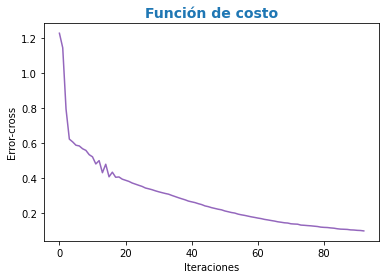

In [12]:
import matplotlib.pyplot as plt
# Se muestra el gráfico que contiene los valores del error para cada iteración, para el error ocupamos la función de costo
# cross-entropy.

fig, ax = plt.subplots()
lista1 = prueba1.l_error
k = len(lista1)
dat = {'Iteraciones':range(0,k),'Error-Entropy':lista1}
ax.plot(dat['Iteraciones'], dat['Error-Entropy'], color = 'tab:purple')
ax.set_title('Función de costo',fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Iteraciones")
ax.set_ylabel("Error-cross")
plt.show()
plt.show()

In [13]:
# se realizan las predicciones ya con el modelo entrenado
prueba1.predict(X, y1_hot)

In [14]:
# pedimos los vectores de probabilidades(Y_gorro)
r = prueba1.y_gorro
r.shape

(400, 2)

In [15]:
# Encontramos los valores que se predijeron en el siguiente ciclo
lim = X.shape
#lim[0]
n = lim[0]
lista_max = []
for i in range(n):
    o = np.argmax(r[i], axis=0)
    lista_max.append(o)
lista_max = np.array(lista_max)
#lista_max

In [16]:
# Se muestra el error que se encontro al evaluar que tan bien predice
prueba1.error_test

0.09720971423976728

<AxesSubplot:title={'center':'Datos Originales'}, xlabel='x1', ylabel='x2'>

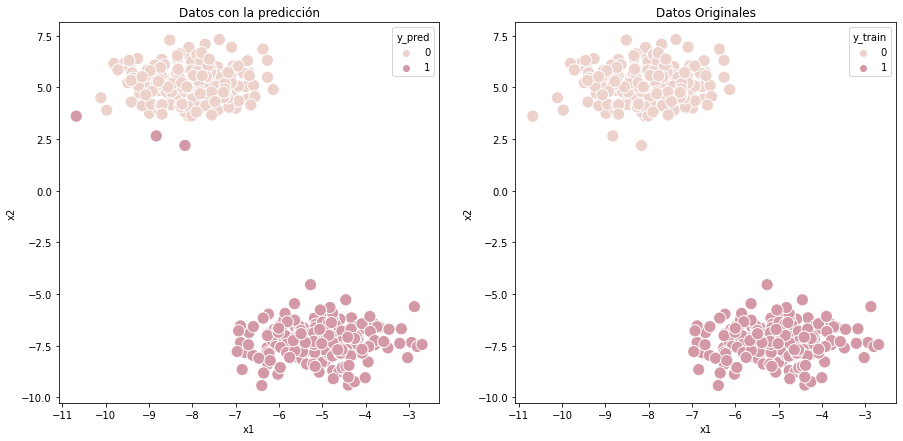

In [17]:
xx = pd.DataFrame(X)
repre = pd.DataFrame({'x1':xx.iloc[:,0], 'x2':xx.iloc[:,1], 'y_pred':lista_max, 'y_train':y_categorias})
fig = plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace = 0.5)
fig.add_subplot(121)
plt.title('Datos con la predicción')
sns.scatterplot(x='x1', y='x2', data = repre, hue='y_pred',s=150, legend="full", hue_norm=(0, 4))

fig.add_subplot(122)
plt.title('Datos Originales')
sns.scatterplot(x='x1', y='x2', data = repre, hue='y_train',s=150, legend="full", hue_norm=(0, 4))

In [18]:
from sklearn.metrics import accuracy_score

# se imprime en pantalla en valor de accuracy obtenido al introducir los datos de entrenamiento
print("Train accuracy: ",accuracy_score(y_categorias, lista_max))
print()

Train accuracy:  0.9925



In [28]:
# Ahora volvemos a hacer lo mismo pero con otro conjunto de datos
X2, y_categorias2 = make_blobs(n_samples=800, n_features=2, centers=3, cluster_std=0.85, shuffle=True, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X2, y_categorias2, test_size=0.50, random_state=42)

In [29]:
y1 = pd.DataFrame(y_train)
y1.columns = ['grupo']
y1.grupo = y1.grupo.astype('category')
y1_hot = pd.get_dummies(y1,drop_first=False)
y1_hot = y1_hot.values

In [30]:
y2 = pd.DataFrame(y_test)
y2.columns = ['grupo']
y2.grupo = y2.grupo.astype('category')
y2_hot = pd.get_dummies(y2,drop_first=False)
y2_hot = y2_hot.values

In [37]:
Kobe8 = NN1HD(u_neuronas = 30)
Kobe8.train(X_train, y1_hot, 0.2, 1000, 0.1)

In [38]:
Kobe8.predict(X_test, y2_hot)

In [39]:
r = Kobe8.y_gorro

lim = X_test.shape
#lim[0]
n = lim[0]
lista_max = []
for i in range(n):
    o = np.argmax(r[i], axis=0)
    lista_max.append(o)
lista_max = np.array(lista_max)
#lista_max

In [40]:
# Se muestra el error que se encontro al evaluar que tan bien predice
Kobe8.error_test

0.22454005823018636

<AxesSubplot:title={'center':'Datos Originales-Ejemplo2'}, xlabel='x1', ylabel='x2'>

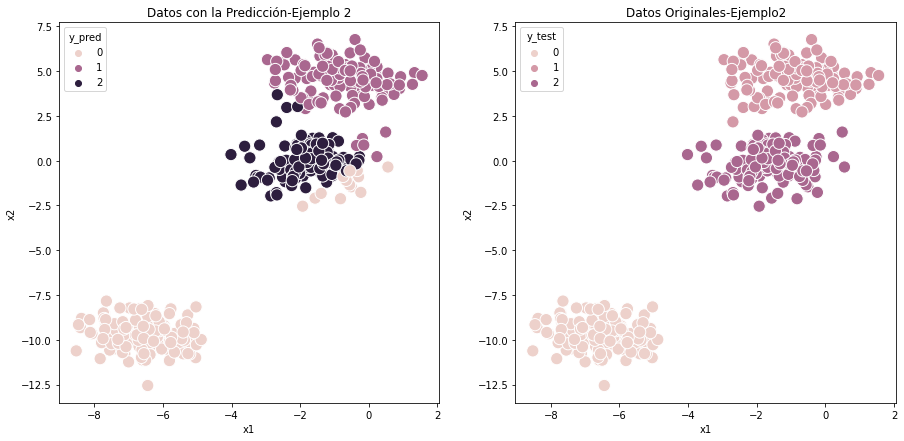

In [41]:
xx = pd.DataFrame(X_test)
repre = pd.DataFrame({'x1':xx.iloc[:,0], 'x2':xx.iloc[:,1], 'y_pred':lista_max, 'y_test':y_test})
fig = plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace = 0.5)
fig.add_subplot(121)
plt.title('Datos con la Predicción-Ejemplo 2')
sns.scatterplot(x='x1', y='x2', data = repre, hue='y_pred', s=150, legend = 'full')

fig.add_subplot(122)
plt.title('Datos Originales-Ejemplo2')
sns.scatterplot(x='x1', y='x2', data = repre, hue='y_test', s=150, legend="full", hue_norm=(0, 4))

In [42]:
from sklearn.metrics import accuracy_score

print("Test accuracy: ",accuracy_score(y_test, lista_max))
print()

Test accuracy:  0.94



Al trabajar con distintos grupos de datos se observo un poco de cambio en los resultados y fue ligeramente mejor para el caso de solo tener dos grupos ya que el valor de accuracy que obtuvimos fue de 0.99 mientras que para caso de 3 en adelante no hubo muchos casos en donde se obtuviera un valor de accuracy igual cercano quiza pero no mejor e incluso se necesitaron un más elemento en la capa oculta para mejorar las predicciones. 

Note que al igual que número de unidades en la capa oculta se aumentaron tambíen se incremento el número de repeticiones para el casos de más de tres grupos o centros. 

3. Considera los datos de dígitos MNIST. 

(a) Usando la API de keras para tensorflow (`tf.keras`), implementa un baseline basado en regresión logística (multiclase) para la clasificación de dígitos. Reporta su desempeño con las métricas que creas conveniente. Muestra el grafo computacional correspondiente, así como sus métricas, usando tensorboard. 

<font color=green>Tu respuesta aquí</font>


In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features = 28*28
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

# MNIST dataset parameters.
num_classes = 10 # 0 to 9 digits

In [3]:
import os
import datetime
e_n = 15 # epocas
def create_model_logis(n_neuronas = num_classes):
  return tf.keras.models.Sequential([tf.keras.layers.Dense(n_neuronas, activation='softmax', input_shape=(num_features,))])

In [4]:
def train_model():
  model = create_model_logis()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(x = x_train, 
            y = y_train, 
            epochs = e_n, 
            validation_data = (x_test, y_test), 
            callbacks = [tensorboard_callback])

In [5]:
train_model()

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7192 - accuracy: 0.8155 - val_loss: 0.3066 - val_accuracy: 0.9150
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3094 - accuracy: 0.9138 - val_loss: 0.2805 - val_accuracy: 0.9227
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.9196 - val_loss: 0.2723 - val_accuracy: 0.9242
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy: 0.9239 - val_loss: 0.2703 - val_accuracy: 0.9250
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2674 - accuracy: 0.9242 - val_loss: 0.2653 - val_accuracy: 0.9260
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2561 - accuracy: 0.9278 - val_loss: 0.2646 - val_accuracy: 0.9262
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2509 - accuracy: 0.9298 - val_loss: 0.2639 - val_accuracy:

In [112]:
%load_ext tensorboard
%tensorboard --logdir logs

(b) Nuevamente, usando la API de keras, implementa redes neuronales con 1, 2 y 3 unidades ocultas. ¿Qué mejoras obtienes en cada caso respecto al baseline? Reporta todos tus hallazgos. Usa tensorboard para mostrar el modelo y las gráficas que consideres informativas. ¿Qué modelo escogerías en éste caso y porqué?

En ambos incisos, reporta los parámetros que uses, incluyendo el número de unidades ocultas en la capa, el optimizador (uno solo para todos los modelos), el número de datos de entrenamiento, validación, batch, etcétera. SOLO UTILIZA lo que hemos visto hasta ahora.

<font color=green>Tu respuesta aquí</font>


In [6]:
# vamos a crear el modelo con 1 neurona 
e_n2 = 15
def create_model_1():
  return tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(num_features,)),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')])

In [7]:
# vamos a crear el modelo con 2 neuronas
def create_model_2():
  return tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(num_features,)),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')])

In [8]:
# vamos a crear el modelo con 3 neuronas
def create_model_3():
  return tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(num_features,)),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')])

In [9]:
def train_model_1():
  model = create_model_1()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(x = x_train, 
            y = y_train, 
            epochs = e_n2, 
            validation_data = (x_test, y_test), 
            callbacks = [tensorboard_callback])

In [10]:
def train_model_2():
  model = create_model_2()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(x = x_train, 
            y = y_train, 
            epochs = e_n2, 
            validation_data = (x_test, y_test), 
            callbacks = [tensorboard_callback])

In [11]:
def train_model_3():
  model = create_model_3()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(x = x_train, 
            y = y_train, 
            epochs = e_n2, 
            validation_data = (x_test, y_test), 
            callbacks = [tensorboard_callback])

### 1 Neurona

Se cuenta con 15 epocas, optimizador:adam, función de costo:sparse_categorical_crossentropy, metrica: accuracy, outputlayer: función de activación-softmax con 10 neuronas y una capa oculta con 25 neuronas-función de activación-relu.

In [12]:
train_model_1()

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6607 - accuracy: 0.8135 - val_loss: 0.2226 - val_accuracy: 0.9390
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2192 - accuracy: 0.9380 - val_loss: 0.1814 - val_accuracy: 0.9501
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1722 - accuracy: 0.9507 - val_loss: 0.1577 - val_accuracy: 0.9542
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1389 - accuracy: 0.9604 - val_loss: 0.1372 - val_accuracy: 0.9595
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1263 - accuracy: 0.9637 - val_loss: 0.1321 - val_accuracy: 0.9613
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1158 - accuracy: 0.9664 - val_loss: 0.1312 - val_accuracy: 0.9631
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1055 - accuracy: 0.9686 - val_loss: 0.1251 - val_accuracy:

### 2 Neuronas

Se cuenta con 15 epocas, optimizador:adam, función de costo:sparse_categorical_crossentropy, metrica: accuracy, outputlayer: función de activación-softmax con 10 neuronas y dos capas ocultas con 25 neuronas-función de activación-relu.

In [13]:
train_model_2()

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6645 - accuracy: 0.7975 - val_loss: 0.2328 - val_accuracy: 0.9315
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2159 - accuracy: 0.9363 - val_loss: 0.1792 - val_accuracy: 0.9465
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1642 - accuracy: 0.9509 - val_loss: 0.1571 - val_accuracy: 0.9515
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1376 - accuracy: 0.9582 - val_loss: 0.1500 - val_accuracy: 0.9544
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1240 - accuracy: 0.9624 - val_loss: 0.1409 - val_accuracy: 0.9579
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1067 - accuracy: 0.9673 - val_loss: 0.1486 - val_accuracy: 0.9564
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0981 - accuracy: 0.9713 - val_loss: 0.1340 - val_accuracy:

### 3 Neuronas

Se cuenta con 15 epocas, optimizador:adam, función de costo:sparse_categorical_crossentropy, metrica: accuracy, outputlayer: función de activación-softmax con 10 neuronas y tres capas ocultas con 25 neuronas-función de activación-relu.

In [14]:
train_model_3()

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6208 - accuracy: 0.8124 - val_loss: 0.2245 - val_accuracy: 0.9344
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1888 - accuracy: 0.9457 - val_loss: 0.1563 - val_accuracy: 0.9534
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1509 - accuracy: 0.9568 - val_loss: 0.1399 - val_accuracy: 0.9586
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9627 - val_loss: 0.1353 - val_accuracy: 0.9577
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1120 - accuracy: 0.9660 - val_loss: 0.1346 - val_accuracy: 0.9612
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0947 - accuracy: 0.9719 - val_loss: 0.1202 - val_accuracy: 0.9646
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0863 - accuracy: 0.9734 - val_loss: 0.1319 - val_accuracy:

#### Resultados

Se puede observar que la regresión logística no tiene mucha mejora ya que se observa que el valor del accuracy esta variando en su mayoria entre 0.92 y en pocos casos en 0.93, los resultados son diferentes para el momento de introducir redes neuronales ya que el valor de accuracy mejora notablemente comparado con regresión logística. Proporcionamos para cada método un total de 15 epocas para las cuales el mejor desempeño se encontro con dos neuronas ya que supera ligeramente el modelo de una capa y no hay mucha diferencia con el de tres capas, por lo que se prefiere el modelo con dos capas.